# Exploratory Data Analysis on mtcars Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots
sns.set(style="whitegrid")


In [2]:

# Load the mtcars dataset
df = pd.read_csv("mtcars.csv")
df.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:

# Shape of dataset
df.shape


(32, 12)

In [4]:

# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:

# Check for missing values
df.isnull().sum()


,0
model,0
mpg,0
cyl,0
disp,0
hp,0
drat,0
wt,0
qsec,0
vs,0
am,0


In [6]:

# Statistical summary of dataset
df.describe()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:

# Unique values in categorical columns
for col in ['cyl','gear','carb','am','vs']:
    print(f"{col}: {df[col].unique()}")


cyl: [6 4 8]
gear: [4 3 5]
carb: [4 1 2 3 6 8]
am: [1 0]
vs: [0 1]


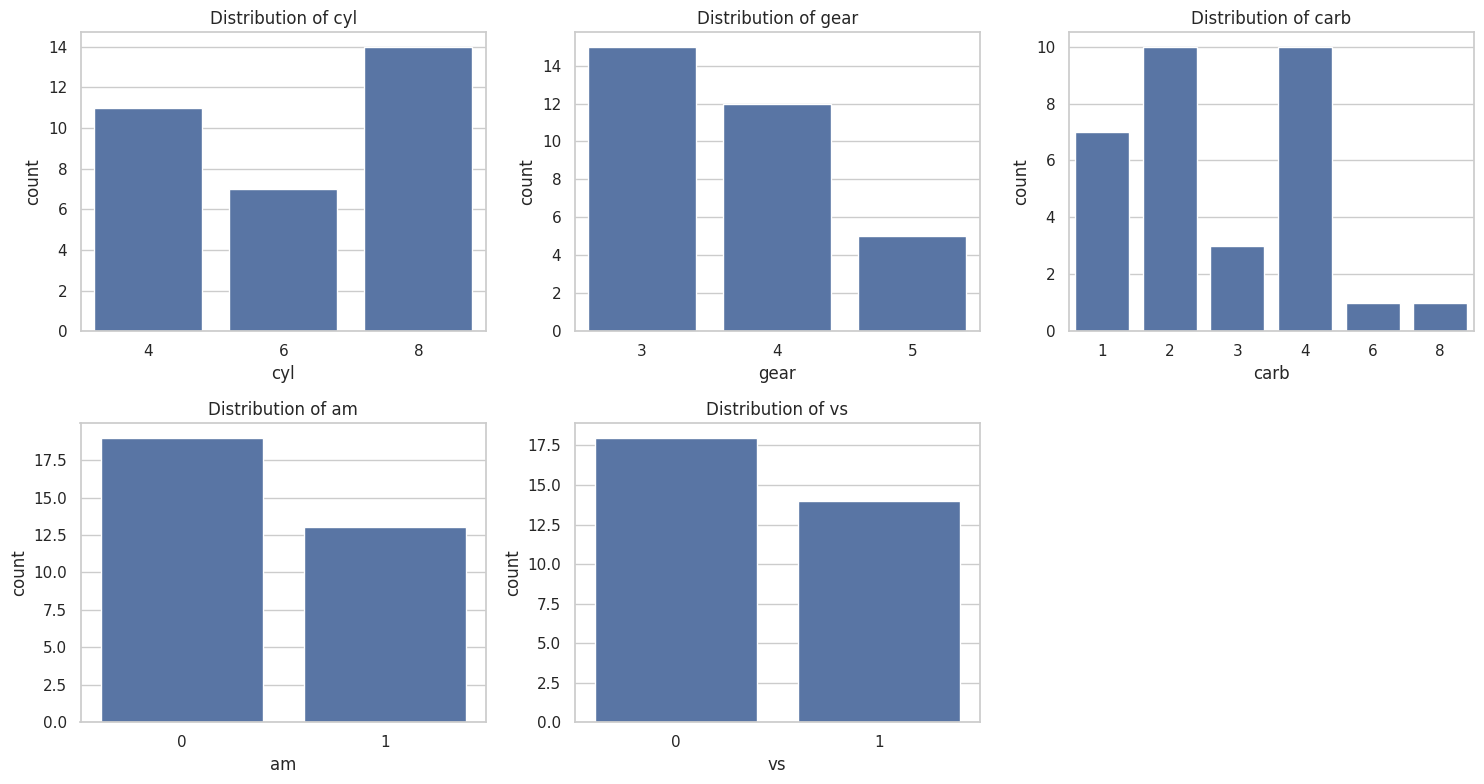

In [8]:

categorical_cols = ['cyl','gear','carb','am','vs']
plt.figure(figsize=(15,8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


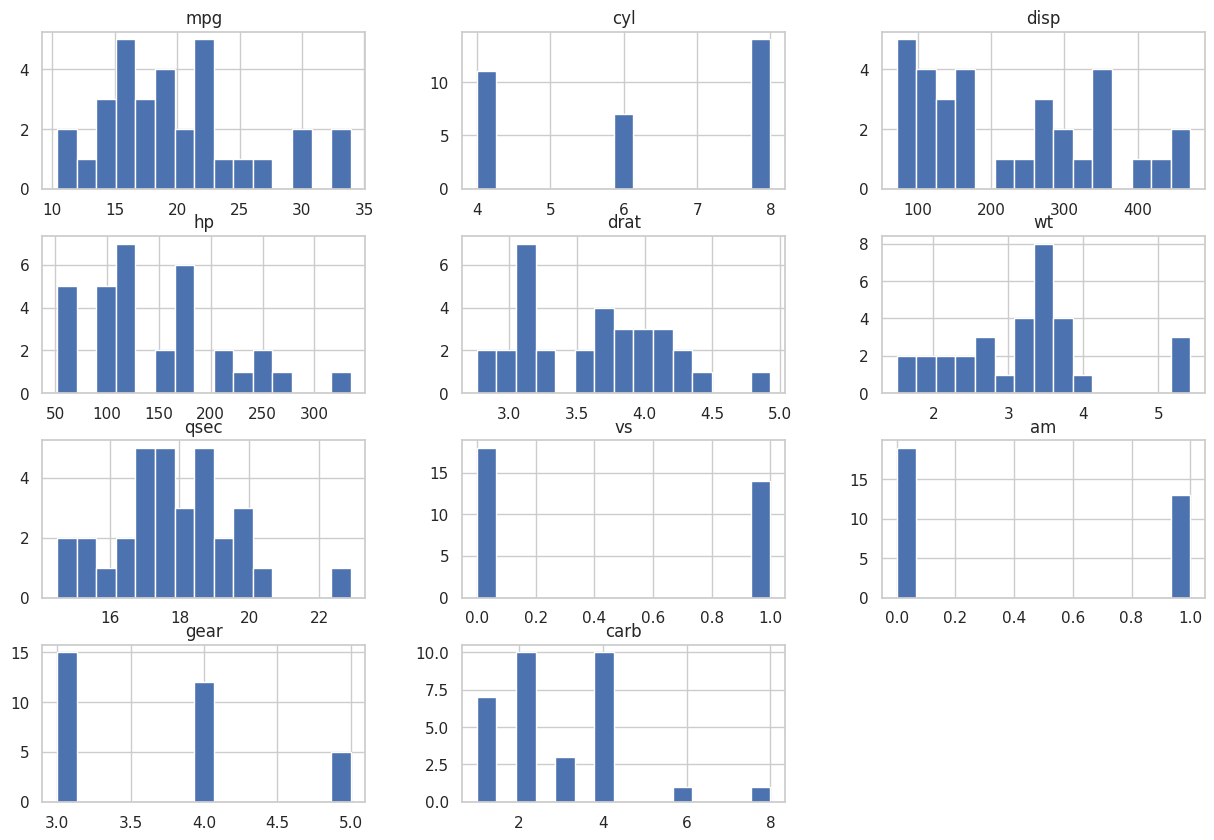

In [9]:

# Histograms for numeric columns
df.drop("model", axis=1).hist(bins=15, figsize=(15,10))
plt.show()


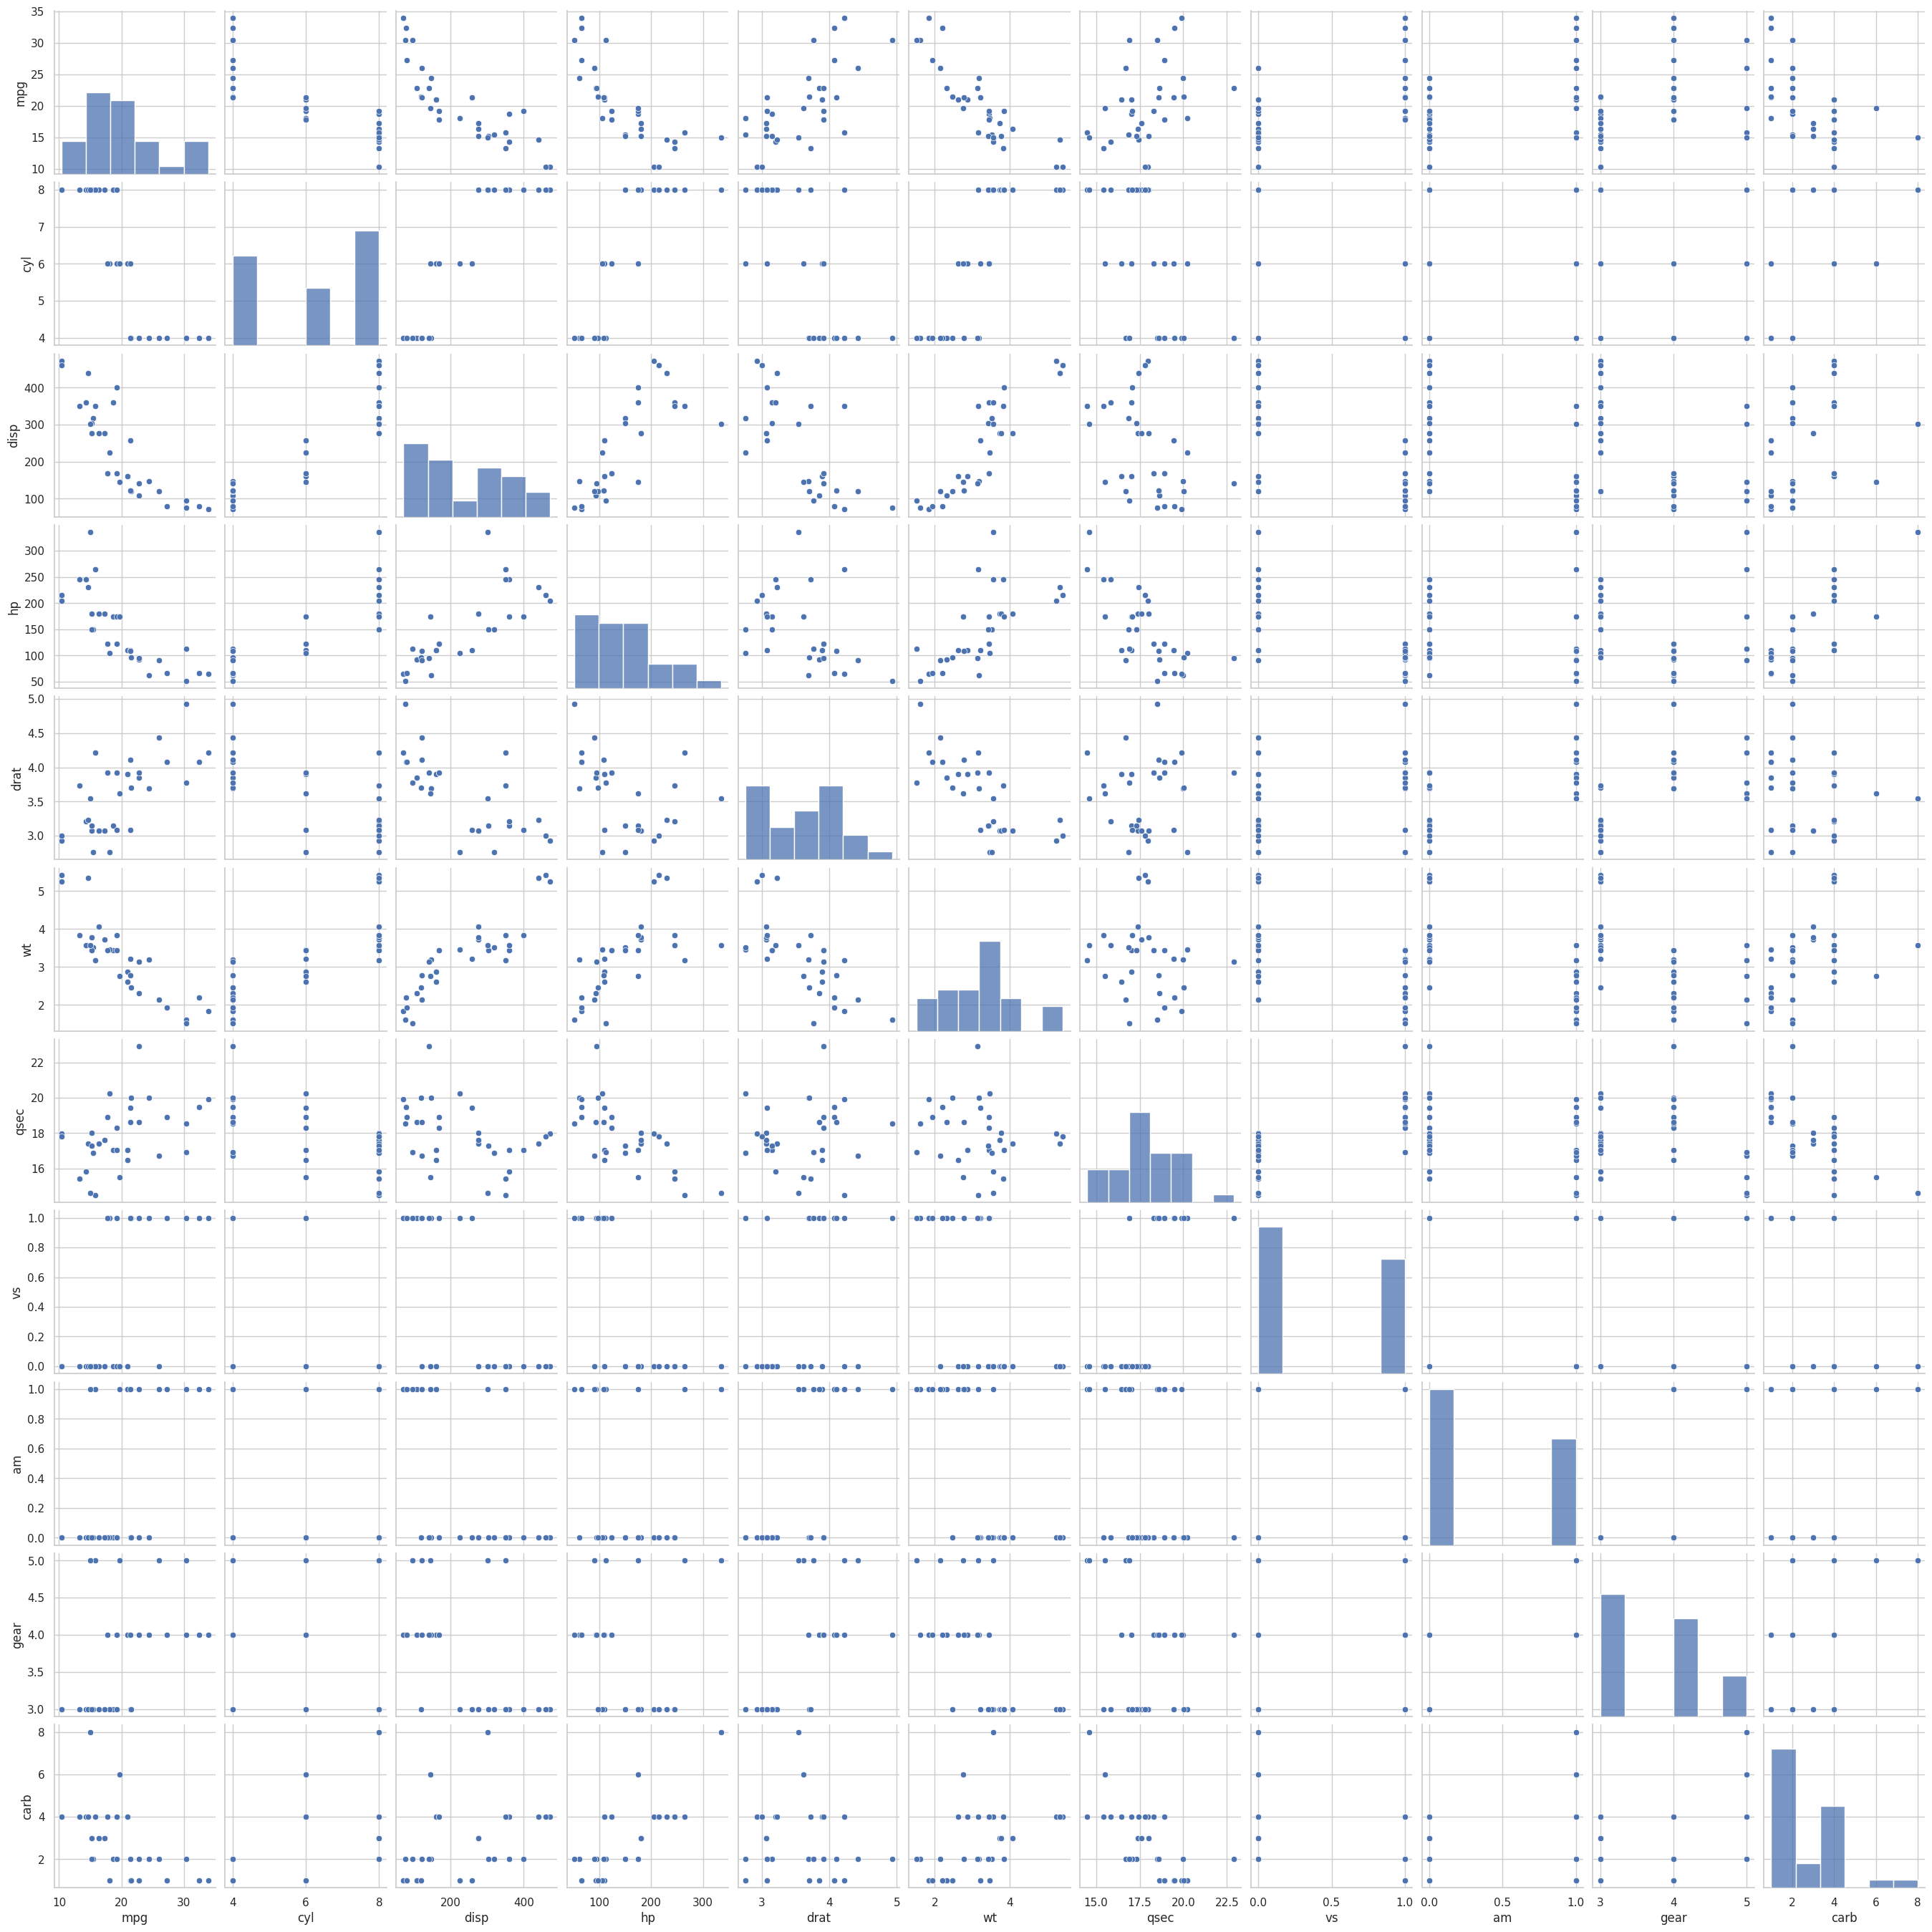

In [10]:

# Pairplot of all features
sns.pairplot(df.drop("model", axis=1))
plt.show()


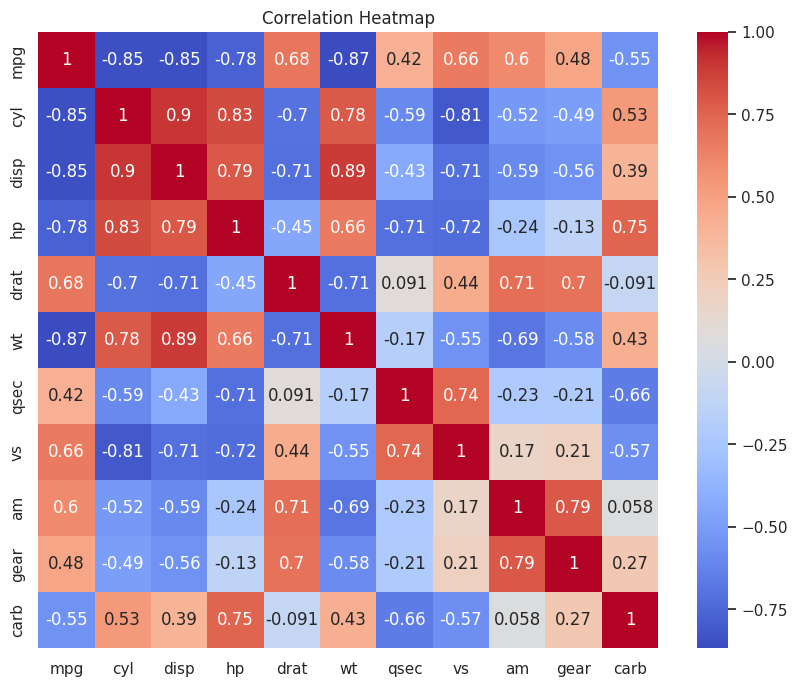

In [11]:

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.drop("model", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


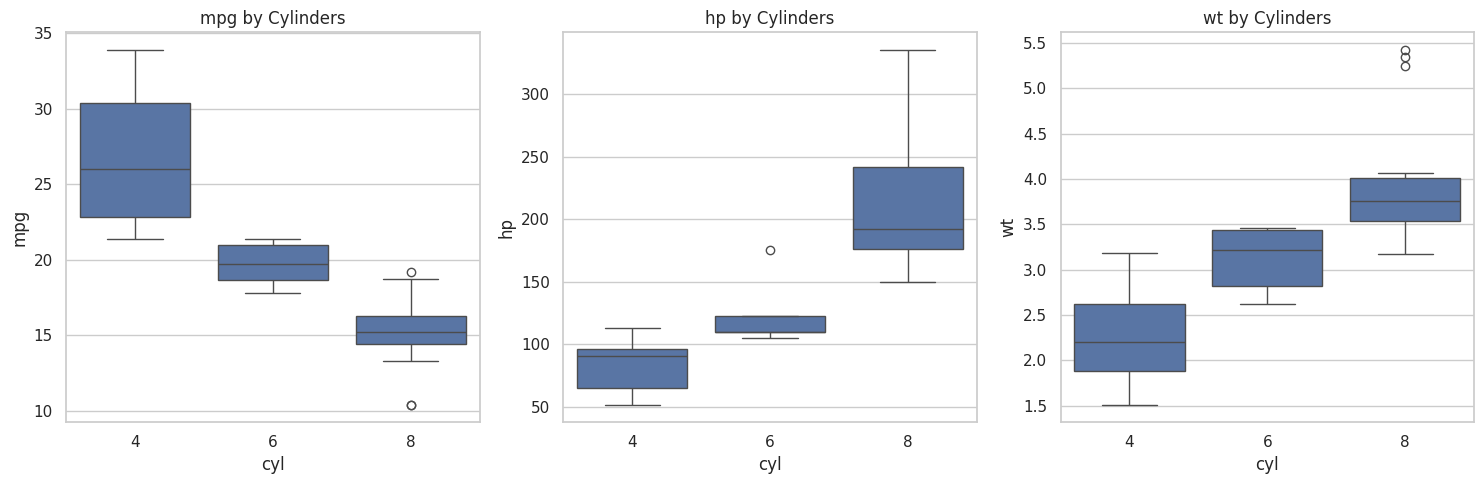

In [12]:

# Boxplots of mpg, hp, wt by cylinders
features = ['mpg','hp','wt']

plt.figure(figsize=(15,5))
for i, col in enumerate(features, 1):
    plt.subplot(1,3,i)
    sns.boxplot(x="cyl", y=col, data=df)
    plt.title(f"{col} by Cylinders")
plt.tight_layout()
plt.show()



### Insights & Observations
- The dataset contains specifications and performance measures of **32 car models**.  
- Fuel efficiency (`mpg`) varies significantly with the number of cylinders: cars with more cylinders generally have lower mpg.  
- Horsepower (`hp`) and weight (`wt`) are strongly correlated with fuel efficiency.  
- Gear and carburetor counts also show notable variations across models.  
- No missing values were found in the dataset.  
